<a href="https://colab.research.google.com/github/adityajaiswal37/BookMySlot-Web-Application/blob/main/GROUP_46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---WATER LEVEL PREDICITION FOR EPICS---



In [ ]:
import numpy as np
import pandas as pdpd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

Load data

In [ ]:
data = pd.read_csv('waterlevels.csv')
X = data.drop(['Water Level'], axis=1)
y = data['Water Level'].values.reshape(-1, 1)
evap = data['Evaporation'].values.reshape(-1, 1)
salinity = data['Salinity'].values.reshape(-1,1 )
precipitation = data['Precipitation'].values.reshape(-1, 1)

Normalize data

In [ ]:
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y)

scaler_evap = MinMaxScaler()
evap = scaler_evap.fit_transform(evap)

scaler_salinity = MinMaxScaler()
salinity = scaler_salinity.fit_transform(salinity)

scaler_precipitation = MinMaxScaler()
precipitation = scaler_precipitation.fit_transform(precipitation)

Combine X and evap, salinity, and precipitation data

In [ ]:
X = np.concatenate((X, evap, salinity, precipitation), axis=1)

Split data into training and testing sets

In [ ]:
split = int(0.9* len(data))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]


Define MLP model with ReLU activation

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,  activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

Train model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 1s 30ms/step - loss: 0.1753 - val_loss: 0.0539
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0341 - val_loss: 0.0017
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0077 - val_loss: 0.0097
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0128 - val_loss: 0.0107
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0100 - val_loss: 0.0034
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0052 - val_loss: 6.9917e-04
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0050 - val_loss: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 9.2154e-04
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 5.7650e-04
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0045 - val_loss: 6.8884e-04
Epoch 11/100

Evaluate model on training set

In [ ]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Training loss:', train_score)

Training loss: 0.003106215037405491


Evaluate model on testing set

In [ ]:
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Testing loss:', test_score)


Testing loss: 0.001120271859690547


Make predictions

In [ ]:
y_test *= 1000
y_test += 35
predictions = scaler_y.inverse_transform(model.predict(X_test))

1/1 [==============================] - 0s 264ms/step


Plot predictions against actual values

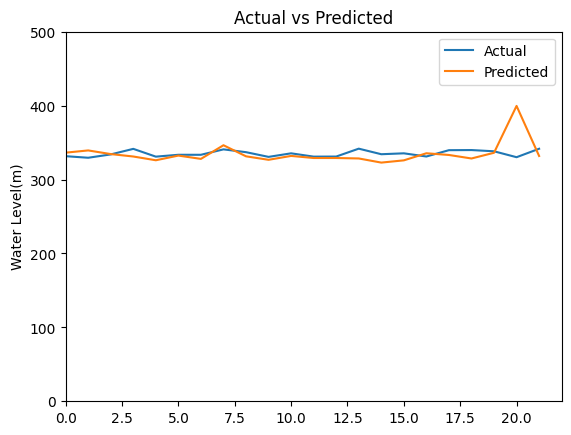

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlim(0,22)
plt.ylim(0,500)
plt.ylabel("Water Level(m)")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()


Plot loss curves for training and testing sets

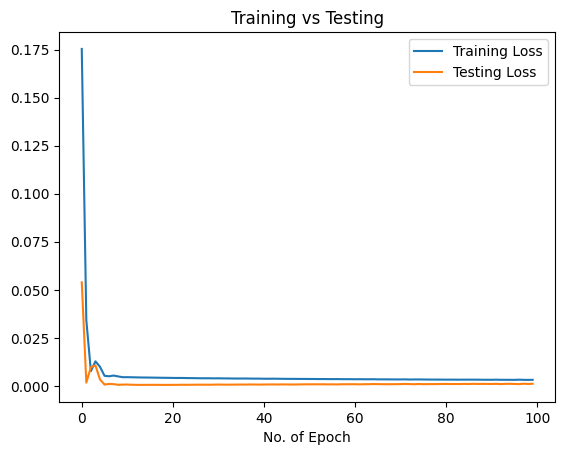

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel("No. of Epoch")
plt.title("Training vs Testing")
plt.legend()
plt.show()
